Use linear regression for forcasting

In [47]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [106]:
series = np.sin(np.arange(0, 20, 0.1)) + np.random.randn(200)*0.1 # add noise to the sin function

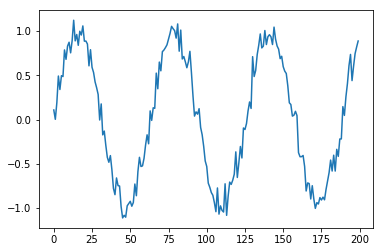

In [107]:
plt.plot(series)
plt.show()

In [108]:
# build dataset

# Predict next value using T past value
T = 10

X = []
Y = []
for t in range(len(y) - T):
    X.append(series[t:t+T])
    Y.append(series[t+T])
X = np.array(X)
Y = np.array(Y)

In [109]:
print("X:", X.shape, "Y:", Y.shape)

X: (190, 10) Y: (190,)


In [110]:
N = len(X)

In [111]:
# build auto regressive linear model

input1 = Input((T,))
x = Dense(1)(input1)

model = Model(input1, x)
model.compile(Adam(0.1), loss="mse", metrics=['accuracy'])

In [112]:
model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 557us/step - loss: 0.7113 - acc: 0.0000e+00 - val_loss: 0.2992 - val_acc: 0.0000e+00
Epoch 2/80
95/95 [==============================] - 0s 434us/step - loss: 0.4956 - acc: 0.0000e+00 - val_loss: 0.2388 - val_acc: 0.0000e+00
Epoch 3/80
95/95 [==============================] - 0s 438us/step - loss: 0.1487 - acc: 0.0000e+00 - val_loss: 0.0795 - val_acc: 0.0000e+00
Epoch 4/80
95/95 [==============================] - 0s 458us/step - loss: 0.1844 - acc: 0.0000e+00 - val_loss: 0.1350 - val_acc: 0.0000e+00
Epoch 5/80
95/95 [==============================] - 0s 442us/step - loss: 0.1323 - acc: 0.0000e+00 - val_loss: 0.0399 - val_acc: 0.0000e+00
Epoch 6/80
95/95 [==============================] - 0s 242us/step - loss: 0.0540 - acc: 0.0000e+00 - val_loss: 0.1219 - val_acc: 0.0000e+00
Epoch 7/80
95/95 [==============================] - 0s 446us/step - loss: 0.1058 - acc: 0.0000e+00 - val_loss: 0.053

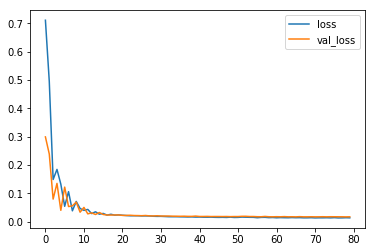

In [113]:
r = model.history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [114]:
validation_target = Y[-N//2:]
validation_predict = []
last_x = X[-N//2]

In [115]:
while len(validation_predict) <  len(validation_target):
    predict = model.predict(last_x.reshape(1, -1))[0, 0]
    validation_predict.append(predict)
    last_x = np.roll(last_x, -1)
    last_x[-1] = predict

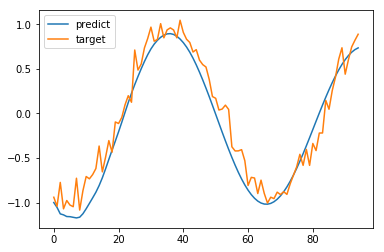

In [116]:
plt.plot(validation_predict, label='predict')
plt.plot(validation_target, label='target')
plt.legend()

the result are not longer as good because of all the noises